In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.io import wavfile
import numpy as np
from scipy import signal
from glob import glob


In [16]:
## set params
nfft = 1024 
colors = plt.cm.Paired(np.linspace(0, 1, 12))
plt.style.use('seaborn-paper')
z_sc = lambda data: (data - np.mean(data))/np.std(data)

In [3]:
## files
EO_baseline = '../../data/6_eeg/Gili_s_brain/Gili_eyes_open.wav'
EC_baseline = '../../data/6_eeg/Gili_s_brain/Gili_eyes_closed.wav'



In [4]:
def extract_wav_data(filepath):
    samplerate, data = wavfile.read(filepath) #HZ, array of data
    data_matx = data.reshape(data.shape[0], 1)
    length = len(data)/samplerate #in s
    
    time = np.linspace(0., length, data.shape[0]) #time array in s

    
    return samplerate, data, time, length, data_matx 


In [5]:
def plot_raw(data, time):
    plt.title('Raw recording')
    
    plt.plot(time, data)

    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (µV)")
    plt.show()

In [6]:
def calc_power(data, samplerate, nfft=nfft):
    f, power = signal.periodogram(data, samplerate, 
                                   scaling='spectrum', 
                                  nfft=nfft)
    
    return f, power


def plot_power(f, power, title='Power over freuqncy'):
    
    plt.title(title)
    plt.bar(f, power)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('Power (µV²)')
    plt.xlim(0,20)
    plt.show()

In [7]:
def plot_specturm(data, samplerate, time_max=None, nfft=nfft):
    
    pxx, freqs, bins, im = plt.specgram(data, 
                                        Fs=samplerate, 
                                        NFFT=nfft, 
                                        mode="magnitude", 
                                        #xextent=(0,time_max), 
                                        scale='linear',
                                        cmap=cm.inferno, 
                                        vmax=500,
                                       )
    plt.colorbar(im).set_label('Power (µV²)')    
    plt.ylim(0,20)
    plt.ylabel("frequency (Hz)")
    plt.xlabel("time (s)")
    plt.show()

In [8]:
edge = 10*400 #n*one sec

def get_avg_power(data, samplerate, edge=edge):

    f, power = calc_power(data[edge:-1*edge], samplerate)
    
    return f, power



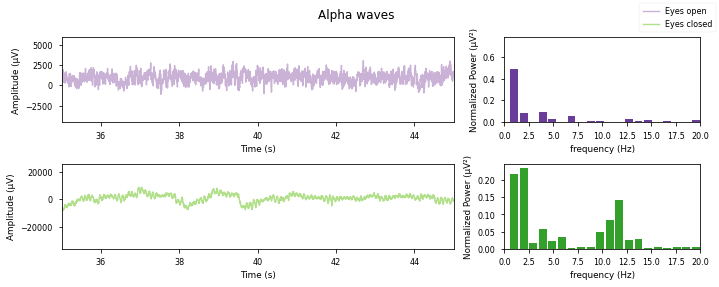

In [17]:
N_HZ = 400
samplerate_EO, data_EO, time_EO, _, _ = extract_wav_data(EO_baseline)
f_EO, power_EO = calc_power(z_sc(data_EO), samplerate_EO)
samplerate_EC, data_EC, time_EC, _, _ = extract_wav_data(EC_baseline)
f_EC, power_EC = calc_power(z_sc(data_EC[N_HZ*35:N_HZ*45]), samplerate_EC)


fig, ax = plt.subplots(2, 2, figsize=(10,4),
                       gridspec_kw={
                           'width_ratios': [2, 1],
                           'height_ratios': [1, 1]})

plt.suptitle('Alpha waves')

ax[0][0].plot(time_EO, data_EO, color=colors[8], label='Eyes open')
ax[0][0].set_xlim(35,45)
#ax[0][0].set_ylim(-1500,1500)
ax[0][0].set_ylabel("Amplitude (µV)")
ax[0][0].set_xlabel("Time (s)")


ax[0][1].bar(f_EO, power_EO, color=colors[9])
ax[0][1].set_xlim(0,20)
ax[0][1].set_xlabel('frequency (Hz)')
ax[0][1].set_ylabel('Normalized Power (µV²)')

ax[1][0].plot(time_EC, data_EC, color=colors[2], label='Eyes closed')
ax[1][0].set_xlim(35,45)
#ax[1][0].set_ylim(-1500,1500)
ax[1][0].set_ylabel("Amplitude (µV)")
ax[1][0].set_xlabel("Time (s)")


ax[1][1].bar(f_EC, power_EC, color=colors[3])
ax[1][1].set_xlim(0,20)
ax[1][1].set_xlabel('frequency (Hz)')
ax[1][1].set_ylabel('Normalized Power (µV²)')


plt.tight_layout()
fig.legend()
plt.show()

In [18]:
eye_mvmnt_v = '../../data/6_eeg/Gili_s_brain/Gili_eyes_open_up_down_saccade.wav'
eye_mvmnt_h = '../../data/6_eeg/Gili_s_brain/Gili_eyes_open_lateral_saccade.wav'


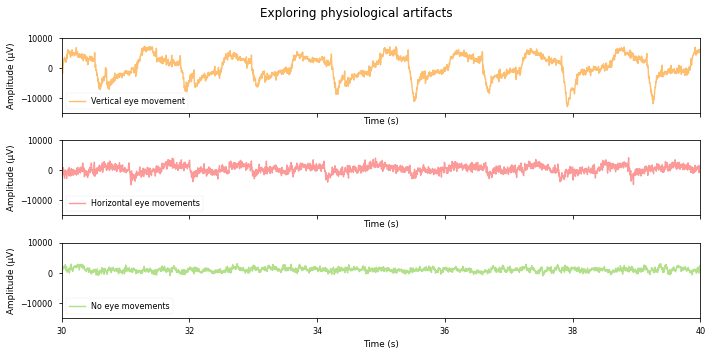

In [19]:
samplerate_MVMT_V, data_MVMT_V, time_MVMT_V, _, _ = extract_wav_data(eye_mvmnt_v)
samplerate_MVMT_H, data_MVMT_H, time_MVMT_H, _, _ = extract_wav_data(eye_mvmnt_h)

fig, ax = plt.subplots(3, 1, figsize=(10,5), sharex=True)
plt.suptitle('Exploring physiological artifacts')

#ax[0].set_title('Vertical eye movement')
ax[0].plot(time_MVMT_V, data_MVMT_V, color=colors[6], label='Vertical eye movement')
ax[0].set_ylabel("Amplitude (µV)")
ax[0].set_xlabel("Time (s)")
ax[0].set_xlim(30,40)
ax[0].set_ylim(-15000,10000)
ax[0].legend()

#ax[1].set_title('Horizontal eye movements')

ax[1].plot(time_MVMT_H, data_MVMT_H, color=colors[4], label='Horizontal eye movements')
ax[1].set_ylabel("Amplitude (µV)")
ax[1].set_xlabel("Time (s)")
ax[1].set_xlim(30,40)
ax[1].set_ylim(-15000,10000)
ax[1].legend()


#ax[2].set_title('No eye movements')

ax[2].plot(time_EO, data_EO, color=colors[2], label='No eye movements')
ax[2].set_ylabel("Amplitude (µV)")
ax[2].set_xlabel("Time (s)")
ax[2].set_xlim(30,40)
ax[2].set_ylim(-15000,10000)
ax[2].legend(loc='lower left')

plt.tight_layout()
plt.show()

can I generate alpha waves?

In [20]:
Aud_12hz = '../../data/6_eeg/Gili_s_brain/Gili_eyes_open_12Hz_auditory.wav'
Vis_12hz = '../../data/6_eeg/Gili_s_brain/Gili_eyes_open_12Hz_2.wav'
EO_med = '../../data/6_eeg/Gili_s_brain/Gili_eyes_open_wall_control_1.wav'



In [21]:
samplerate_Aud_12hz, data_Aud_12hz, time_Aud_12hz, _, _ = extract_wav_data(Aud_12hz)
f_Aud_12hz, power_Aud_12hz = calc_power(z_sc(data_Aud_12hz), samplerate_Aud_12hz)

samplerate_Vis_12hz, data_Vis_12hz, time_Vis_12hz, _, _ = extract_wav_data(Vis_12hz)
f_Vis_12hz, power_Vis_12hz = calc_power(z_sc(data_Vis_12hz), samplerate_Vis_12hz)

samplerate_EO_med, data_EO_med, time_EO_med, _, _ = extract_wav_data(EO_med)
f_EO_med, power_EO_med = calc_power(z_sc(data_EO_med), samplerate_EO_med)


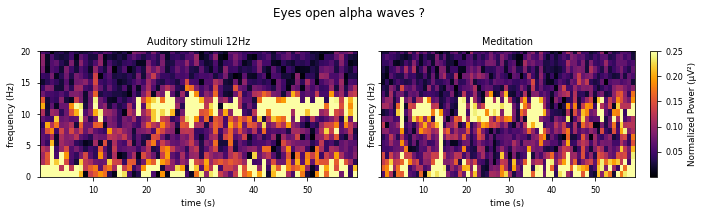

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,3), sharey=True, sharex=True)

plt.suptitle('Eyes open alpha waves ?')

ax[0].set_title('Auditory stimuli 12Hz')
pxx, freqs, bins, im = ax[0].specgram(z_sc(data_Aud_12hz), 
                Fs=samplerate_Aud_12hz, 
                NFFT=nfft, 
                mode="magnitude", 
                #xextent=(0,time_max), 
                scale='linear',
                cmap=cm.inferno,                 
                vmax=.25

               )

ax[0].set_ylim(0,20)
ax[0].set_ylabel("frequency (Hz)")
ax[0].set_xlabel("time (s)")

# ax[1].set_title('Visual stimuli 12Hz')
# pxx, freqs, bins, im = ax[1].specgram(z_sc(data_Vis_12hz), 
#                 Fs=samplerate_Vis_12hz, 
#                 NFFT=nfft, 
#                 mode="magnitude", 
#                 #xextent=(0,time_max), 
#                 scale='linear',
#                 cmap=cm.inferno, 
#                 vmax=.25

#                )

# ax[1].set_ylim(0,20)
# ax[1].set_ylabel("frequency (Hz)")
# ax[1].set_xlabel("time (s)")


ax[1].set_title('Meditation')
pxx, freqs, bins, im = ax[1].specgram(z_sc(data_EO_med), 
                Fs=samplerate_EO_med, 
                NFFT=nfft, 
                mode="magnitude", 
                #xextent=(0,time_max), 
                scale='linear',
                cmap=cm.inferno, 
                vmax=.25
               )
ax[1].set_ylim(0,20)
ax[1].set_ylabel("frequency (Hz)")
ax[1].set_xlabel("time (s)")

plt.tight_layout()
fig.colorbar(im).set_label('Normalized Power (µV²)')    

# plt.show()

In [24]:
#attention matters

In [25]:
EC_attn = '../../data/6_eeg/Gili_s_brain/Gili_eyes_closed_attending.wav'
EC_mental_img = '../../data/6_eeg/Gili_s_brain/Gili_eyes_closed_imaging_blue_knob.wav'


In [26]:
samplerate_EC_attn, data_EC_attn, time_EC_attn, _, _ = extract_wav_data(EC_attn)
f_EC_attn, power_EC_attn = calc_power(z_sc(data_EC_attn), samplerate_EC_attn)

samplerate_mental_img, data_mental_img, time_mental_img, _, _ = extract_wav_data(EC_mental_img)
f_mental_img, power_mental_img = calc_power(z_sc(data_mental_img[N_HZ*40:N_HZ*50]), samplerate_mental_img)



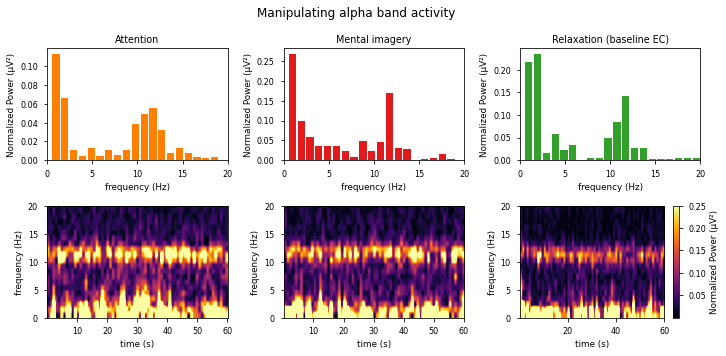

In [27]:
fig, ax = plt.subplots(2, 3, figsize=(10,5))
plt.suptitle('Manipulating alpha band activity')

ax[0][0].set_title('Attention')

ax[0][0].bar(f_EC_attn, power_EC_attn, color=colors[7])
ax[0][0].set_xlim(0,20)
ax[0][0].set_xlabel('frequency (Hz)')
ax[0][0].set_ylabel('Normalized Power (µV²)')

pxx, freqs, bins, im = ax[1][0].specgram(z_sc(data_EC_attn), 
                Fs=samplerate_EC_attn, 
                NFFT=nfft, 
                mode="magnitude", 
                #xextent=(0,time_max), 
                scale='linear',
                cmap=cm.inferno,
                vmax=.25
               )

ax[1][0].set_ylim(0,20)
ax[1][0].set_ylabel("frequency (Hz)")
ax[1][0].set_xlabel("time (s)")


ax[0][1].set_title('Mental imagery')
ax[0][1].bar(f_mental_img, power_mental_img, color=colors[5])
ax[0][1].set_xlim(0,20)
ax[0][1].set_xlabel('frequency (Hz)')
ax[0][1].set_ylabel('Normalized Power (µV²)')

pxx, freqs, bins, im = ax[1][1].specgram(z_sc(data_mental_img), 
                Fs=samplerate_mental_img, 
                NFFT=nfft, 
                mode="magnitude", 
                #xextent=(0,time_max), 
                scale='linear',
                cmap=cm.inferno,
                vmax=.25
               )

ax[1][1].set_ylim(0,20)
ax[1][1].set_ylabel("frequency (Hz)")
ax[1][1].set_xlabel("time (s)")


ax[0][2].set_title('Relaxation (baseline EC)')
ax[0][2].bar(f_EC, power_EC, color=colors[3])
ax[0][2].set_xlim(0,20)

ax[0][2].set_xlabel('frequency (Hz)')
ax[0][2].set_ylabel('Normalized Power (µV²)')

pxx, freqs, bins, im = ax[1][2].specgram(z_sc(data_EC), 
                Fs=samplerate_EC, 
                NFFT=nfft, 
                mode="magnitude", 
                #xextent=(0,time_max), 
                scale='linear',
                cmap=cm.inferno,                
                vmax=.25
 
               )

ax[1][2].set_ylim(0,20)
ax[1][2].set_ylabel("frequency (Hz)")
ax[1][2].set_xlabel("time (s)")

plt.tight_layout()
fig.colorbar(im).set_label('Normalized Power (µV²)')    
